In [65]:
pip install squarify

In [66]:
import numpy as np
import pandas as pd
import matplotlib as plt
import squarify
import seaborn as sn


Explanation of Columns:
1. Index - ID (primary key)
2. Title - Name of the Song
3. Artist - Name of the Singer
4. Top Genre - Genre of the Song
5. Year - Release Year of the Song
6. Beats Per Minute (BPM) - Tempo of the Song
7. Energy - The higher the value, the more energetic the song is
8. Danceability - The higher the value, the more easier it is to dance to the song
9. Loudness (dB) - The higher the value, the louder the song is
10. Liveness - The higher the value, the more likely the song is a live recording
11. Valence - The higher the value, the more positive the song is
12. Length (Duration) - How long the song is
13. Acousticness - The higher the value, the more acoustic the song is
14. Speechiness - The higher the value, the more spoken words
15. Popularity - The higher the value, the more popular the song is

In [67]:
# Understanding what data we have to work with
dataset = pd.read_csv('Spotify-2000.csv')
frame = pd.DataFrame(dataset)
frame = frame.set_index('Index')
print(frame)
frame.columns
frame.head()


                        Title  ... Popularity
Index                          ...           
1                     Sunrise  ...         71
2                 Black Night  ...         39
3              Clint Eastwood  ...         69
4               The Pretender  ...         76
5      Waitin' On A Sunny Day  ...         59
...                       ...  ...        ...
1990         Heartbreak Hotel  ...         63
1991                Hound Dog  ...         69
1992          Johnny B. Goode  ...         74
1993                Take Five  ...         65
1994           Blueberry Hill  ...         56

[1994 rows x 14 columns]


,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [68]:
#Cleaning up the data
frame.dropna(inplace=True)
print(frame.to_string())
frame.shape
#There were no null values in this dataset so we didn't need to remove any rows
frame.duplicated()
frame.drop_duplicates(inplace=True)
frame.shape
#There were duplicate values in this dataset so we didn't need to remove any rows
for x in frame['Length (Duration)']:
  frame['Length (Duration)'] = frame['Length (Duration)'].str.replace(',', "")
frame['Length (Duration)'] = frame['Length (Duration)'].astype(int)

                                                                                                                                      Title                                           Artist                    Top Genre  Year  Beats Per Minute (BPM)  Energy  Danceability  Loudness (dB)  Liveness  Valence Length (Duration)  Acousticness  Speechiness  Popularity
Index                                                                                                                                                                                                                                                                                                                                                                   
1                                                                                                                                   Sunrise                                      Norah Jones              adult standards  2004                     157      30            53         

In [69]:
#Analyzing the data
frame.head()
print(frame.info())
print("-----------------Min-----------------")
print(frame[['Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity']].min())
print("-----------------Max-----------------")
print(frame[['Year', 'Beats Per Minute (BPM)',
       'Energy', 'Danceability', 'Loudness (dB)', 'Liveness', 'Valence',
       'Length (Duration)', 'Acousticness', 'Speechiness', 'Popularity']].max())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1 to 1994
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Artist                  1994 non-null   object
 2   Top Genre               1994 non-null   object
 3   Year                    1994 non-null   int64 
 4   Beats Per Minute (BPM)  1994 non-null   int64 
 5   Energy                  1994 non-null   int64 
 6   Danceability            1994 non-null   int64 
 7   Loudness (dB)           1994 non-null   int64 
 8   Liveness                1994 non-null   int64 
 9   Valence                 1994 non-null   int64 
 10  Length (Duration)       1994 non-null   int64 
 11  Acousticness            1994 non-null   int64 
 12  Speechiness             1994 non-null   int64 
 13  Popularity              1994 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 233.7+ KB
None
---

Takeaways:


*   The data was collected from 1956 - 2019
*   Most of the values for the characteristics of the music (energy, danceability, liveness, valence, acousticness) are judged on a scale of 0-100.



Guiding Questions:
1. What characteristics of songs do Spotify users value the most? 
2. Which artists have had a song placed on the Spotify Top 2000s list multiple times? How many songs?
(Follow up: Do any of these songs have any common words in their titles)
3. Which genres of tracks are the most popular on the list?

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Popularity Ratings'), Text(0.5, 1.0, 'Popularity Histogram')]
59.52657973921765


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 <a list of 8 Text major ticklabel objects>)

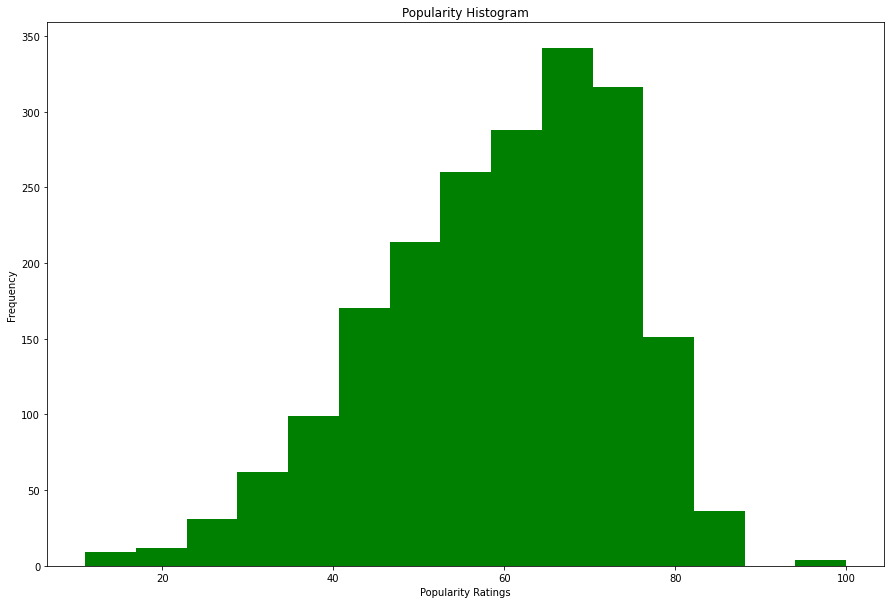

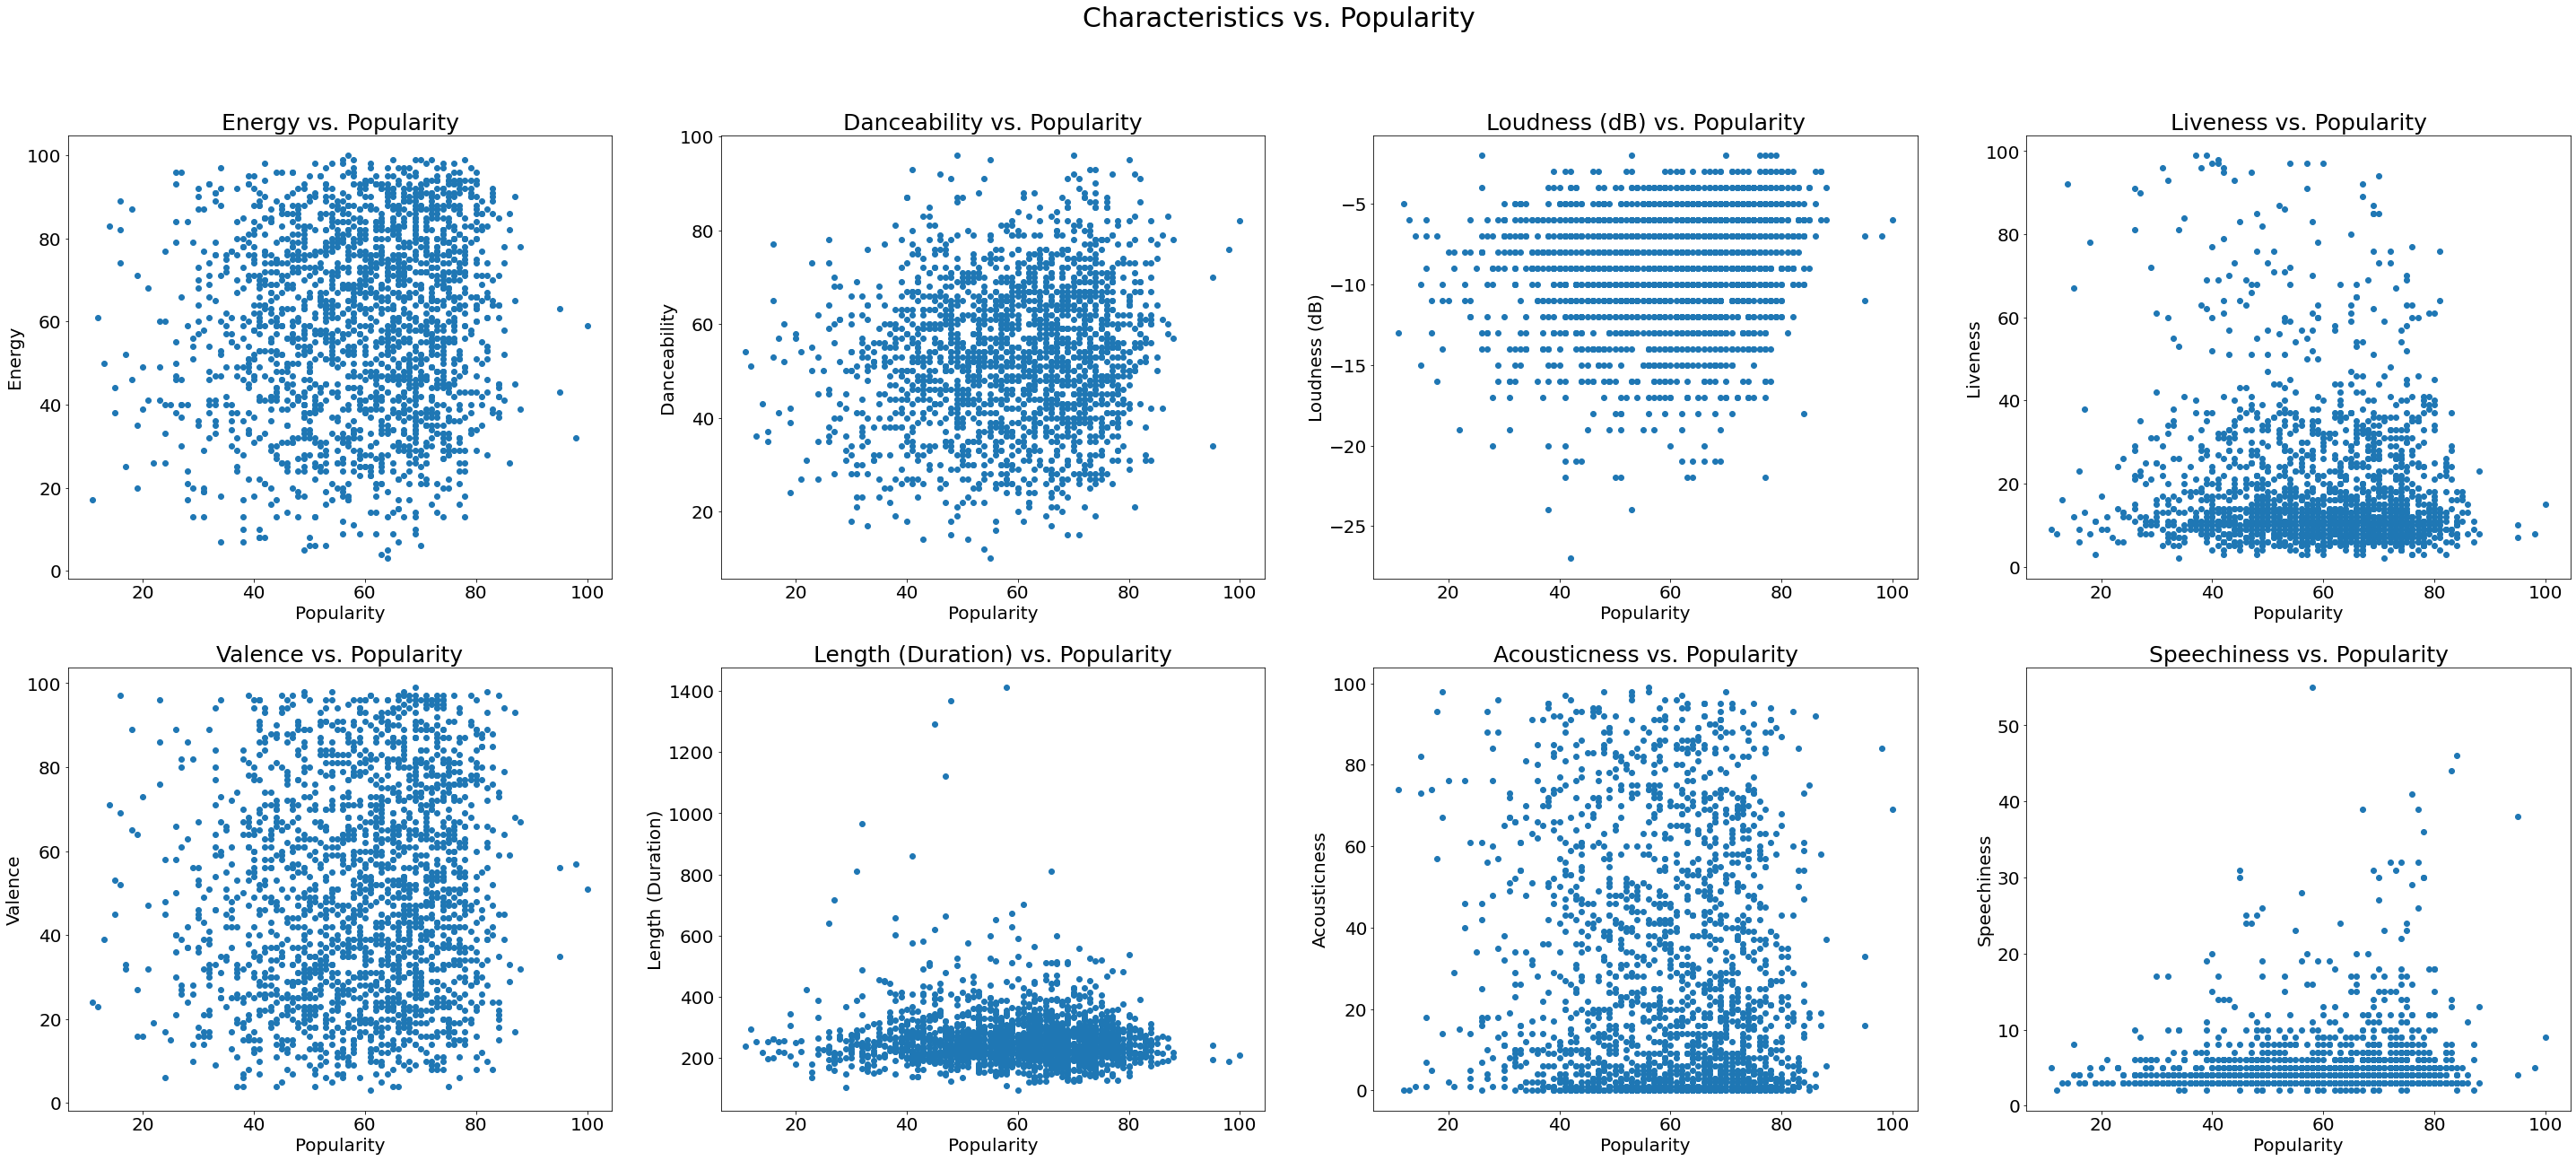

In [70]:
#Guiding Question #1
#Histogram of Popularity Ratings
import matplotlib.pyplot as plt
myFig = plt.figure(figsize=(15,10))
histogram = plt.hist(frame['Popularity'], bins=15, color='g')
histogram = plt.gca().set(title="Popularity Histogram", xlabel="Popularity Ratings", ylabel="Frequency")
print(histogram)
mean = frame.Popularity.mean()
print(mean)
frame.describe()
#We are going to take the popularity values between the upper percentile (75%) and the max and determine which characteristics of the song correlate with popularity
#frame["Popularity_Check"]= frame['Popularity'] >= 71
#popularity_frame = frame[frame['Popularity_Check']==True]
#myFig, myAxes = plt.subplots(2,5, sharex=True, sharey=False, figsize=(15,10))
#plt.suptitle("Correlation of Characteristics with Popularity")
#myAxes[0,1] = plt.scatter(frame["Popularity"], frame["Energy"])
#myAxes[0,2] = plt.scatter(frame["Popularity"], frame["Danceability"])
#myAxes[0,1].set_title("Energy vs. Popularity")
#plt.show()
fig1 = plt.figure(figsize=(50, 20))
fig1.suptitle("Characteristics vs. Popularity", fontsize=30)
plt.subplot(2,4,1)
plt.subplot(2,4,1).set_title("Energy vs. Popularity", fontsize=25)
plt.scatter(frame["Popularity"], frame["Energy"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Energy", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(2,4,2)
plt.subplot(2,4,2).set_title("Danceability vs. Popularity", fontsize=25)
plt.scatter(frame["Popularity"], frame["Danceability"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Danceability", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(2,4,3)
plt.subplot(2,4,3).set_title("Loudness (dB) vs. Popularity", fontsize=25)
plt.scatter(frame["Popularity"], frame["Loudness (dB)"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Loudness (dB)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(2,4,4)
plt.subplot(2,4,4).set_title("Liveness vs. Popularity", fontsize=25)
plt.scatter(frame["Popularity"], frame["Liveness"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Liveness", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(2,4,5)
plt.subplot(2,4,5).set_title("Valence vs. Popularity", fontsize=25)
plt.scatter(frame["Popularity"], frame["Valence"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Valence", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(2,4,6)
plt.subplot(2,4,6).set_title("Length (Duration) vs. Popularity", fontsize=25)
plt.scatter(frame["Popularity"], frame["Length (Duration)"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Length (Duration)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(2,4,7)
plt.subplot(2,4,7).set_title("Acousticness vs. Popularity", fontsize=25)
plt.scatter(frame["Popularity"], frame["Acousticness"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Acousticness", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.subplot(2,4,8)
plt.subplot(2,4,8).set_title("Speechiness vs. Popularity", fontsize=25)
plt.scatter(frame["Popularity"], frame["Speechiness"])
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Speechiness", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


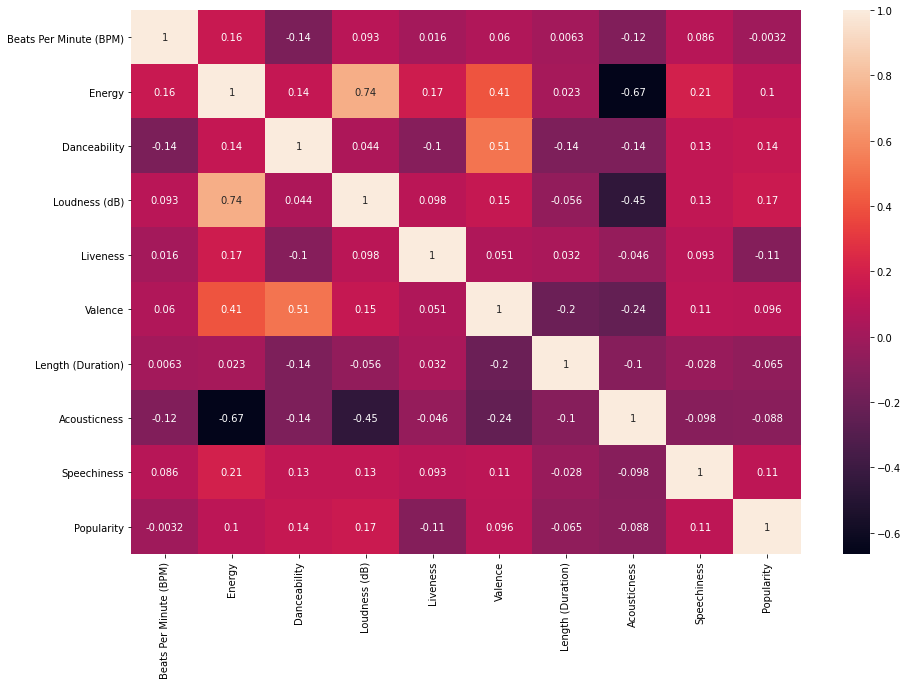

In [71]:
#Guiding Question #1 (Follow-up)
#Since popularity and the other characteristics aren't correlated with one another, are there any variables that are highly correlated with one another  
import matplotlib.pyplot as plt

myFig = plt.figure(figsize=(15, 10))
df = pd.DataFrame(frame, columns=["Beats Per Minute (BPM)", "Energy", "Danceability", "Loudness (dB)", "Liveness", "Valence", "Length (Duration)", "Acousticness", "Speechiness", "Popularity"])
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

    Year  Beats Per Minute (BPM)  ...  Speechiness  Popularity
0   1956               95.000000  ...     6.000000   62.000000
1   1958              144.600000  ...     7.200000   67.800000
2   1959              158.333333  ...     4.666667   65.000000
3   1960               87.000000  ...     3.000000   74.000000
4   1961              100.000000  ...     3.000000   78.000000
..   ...                     ...  ...          ...         ...
58  2015              121.880952  ...     5.357143   53.500000
59  2016              121.285714  ...     4.400000   57.342857
60  2017              118.777778  ...     6.600000   62.800000
61  2018              116.865385  ...     5.326923   49.865385
62  2019              117.047619  ...     6.857143   63.952381

[63 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses 

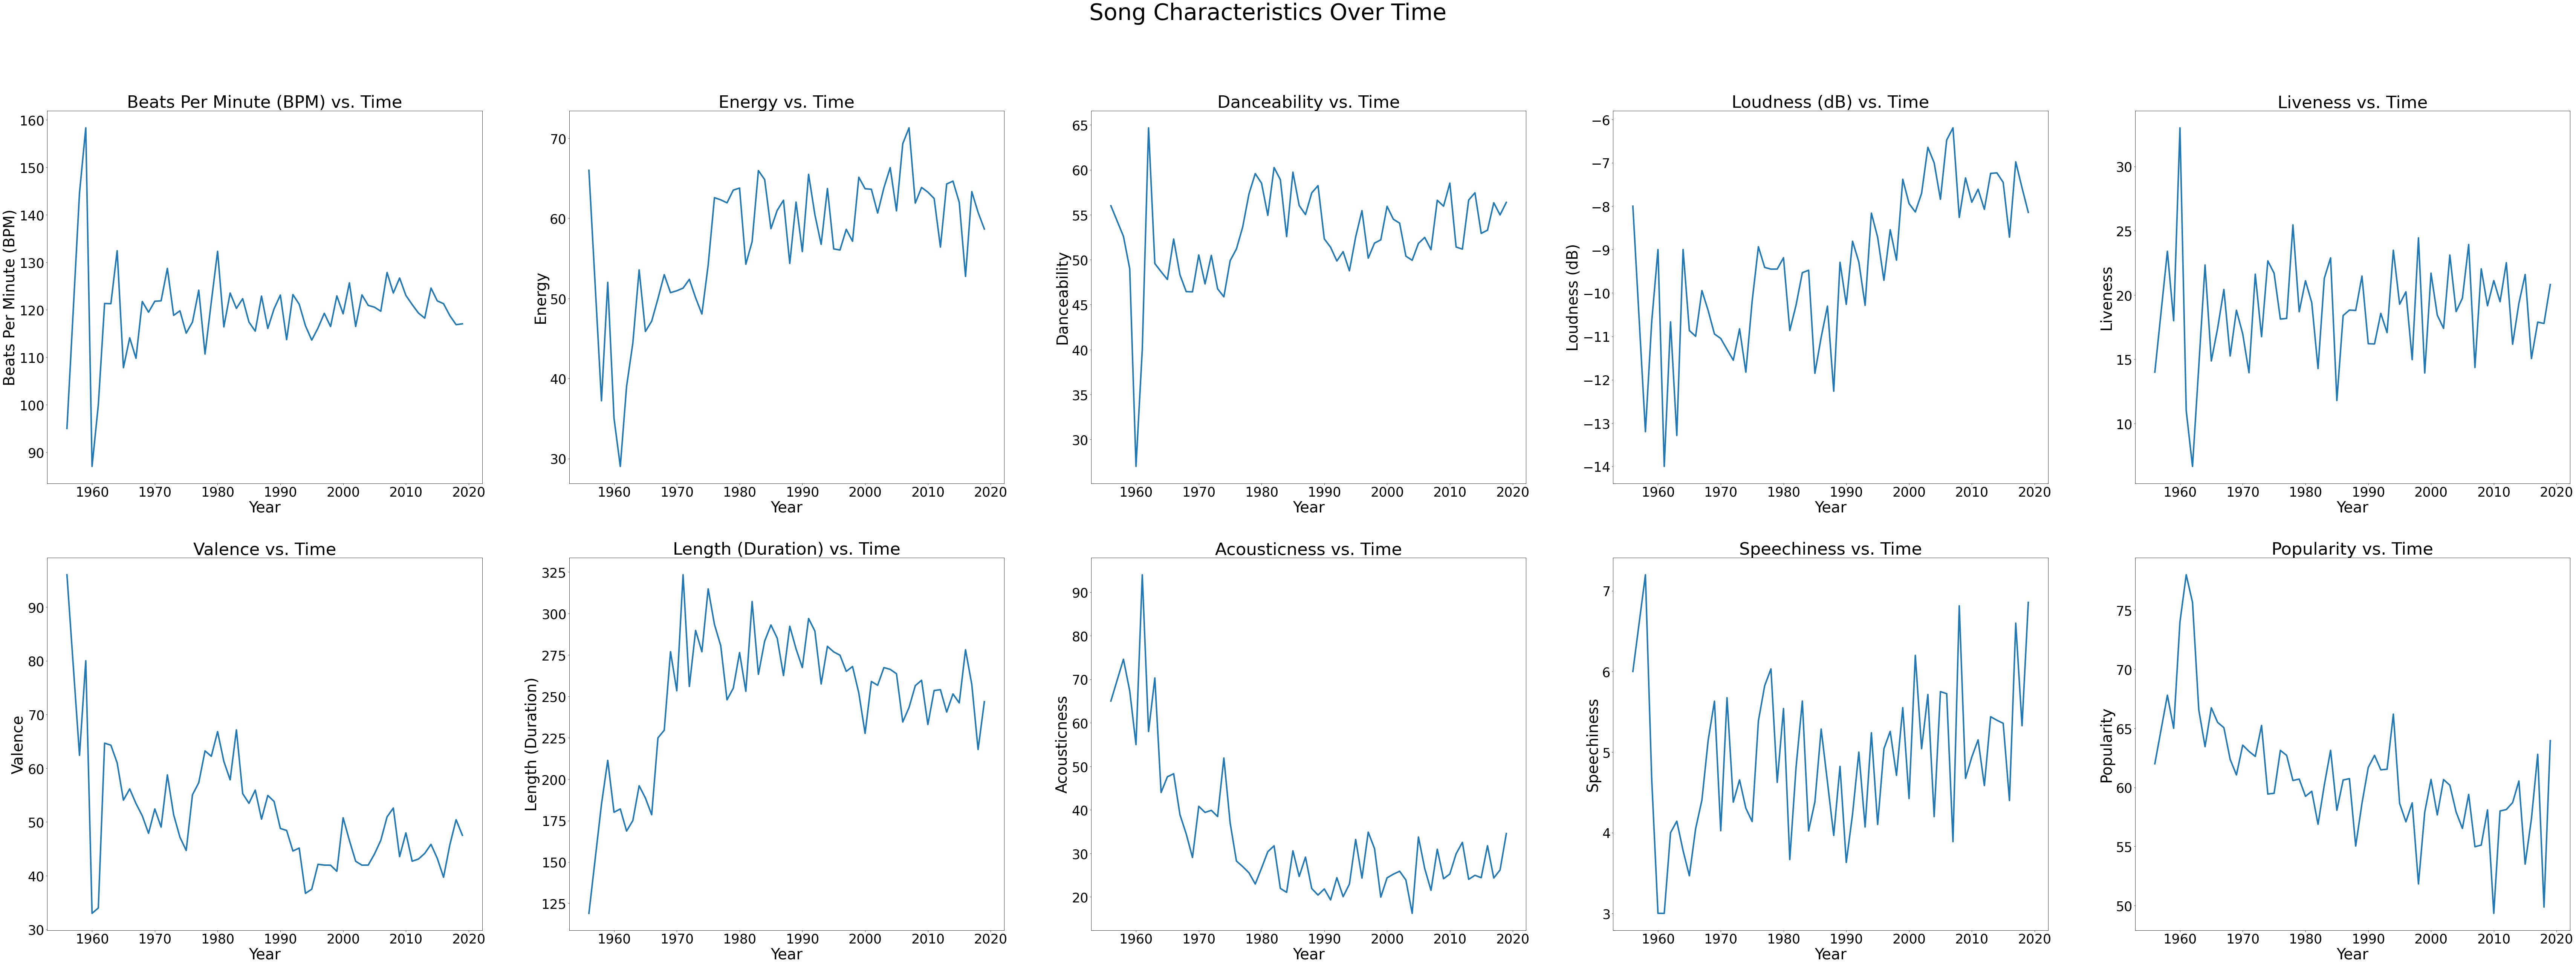

In [57]:
#Guiding Question #1 (Follow-up)
#How have these characteristics changed over the years?
year_average = frame[["Beats Per Minute (BPM)", "Energy", "Danceability", "Loudness (dB)", "Liveness", "Valence", "Length (Duration)", "Acousticness", "Speechiness", "Popularity", "Year"]].groupby('Year').mean().sort_values(by="Year", ascending=True).reset_index()
print(year_average)
myFig = plt.figure(figsize=(120,40))
myFig.suptitle("Song Characteristics Over Time", fontsize=60)
plt.subplot(2,5,1)
plt.subplot(2,5,1).set_title("Beats Per Minute (BPM) vs. Time", fontsize=45)
plt.plot(year_average['Year'], year_average['Beats Per Minute (BPM)'], linewidth=4)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Beats Per Minute (BPM)", fontsize=40)
plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)
plt.subplot(2,5,2)
plt.subplot(2,5,2).set_title("Energy vs. Time", fontsize=45)
plt.plot(year_average['Year'], year_average['Energy'], linewidth=4)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Energy", fontsize=40)
plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)
plt.subplot(2,5,3)
plt.subplot(2,5,3).set_title("Danceability vs. Time", fontsize=45)
plt.plot(year_average['Year'], year_average['Danceability'], linewidth=4)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Danceability", fontsize=40)
plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)
plt.subplot(2,5,4)
plt.subplot(2,5,4).set_title("Loudness (dB) vs. Time", fontsize=45)
plt.plot(year_average['Year'], year_average['Loudness (dB)'], linewidth=4)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Loudness (dB)", fontsize=40)
plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)
plt.subplot(2,5,5)
plt.subplot(2,5,5).set_title("Liveness vs. Time", fontsize=45)
plt.plot(year_average['Year'], year_average['Liveness'], linewidth=4)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Liveness", fontsize=40)
plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)
plt.subplot(2,5,6)
plt.subplot(2,5,6).set_title("Valence vs. Time", fontsize=45)
plt.plot(year_average['Year'], year_average['Valence'], linewidth=4)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Valence", fontsize=40)
plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)
plt.subplot(2,5,7)
plt.subplot(2,5,7).set_title("Length (Duration) vs. Time", fontsize=45)
plt.plot(year_average['Year'], year_average['Length (Duration)'], linewidth=4)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Length (Duration)", fontsize=40)
plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)
plt.subplot(2,5,8)
plt.subplot(2,5,8).set_title("Acousticness vs. Time", fontsize=45)
plt.plot(year_average['Year'], year_average['Acousticness'], linewidth=4)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Acousticness", fontsize=40)
plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)
plt.subplot(2,5,9)
plt.subplot(2,5,9).set_title("Speechiness vs. Time", fontsize=45)
plt.plot(year_average['Year'], year_average['Speechiness'], linewidth=4)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Speechiness", fontsize=40)
plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)
plt.subplot(2,5,10)
plt.subplot(2,5,10).set_title("Popularity vs. Time", fontsize=45)
plt.plot(year_average['Year'], year_average['Popularity'], linewidth=4)
plt.xlabel("Year", fontsize=40)
plt.ylabel("Popularity", fontsize=40)
plt.tick_params(axis='x', labelsize=35)
plt.tick_params(axis='y', labelsize=35)
plt.show()

                     Count
Artist                    
Queen                   37
The Beatles             36
Coldplay                27
U2                      26
The Rolling Stones      24
...                    ...
Neet Oét Lottum          1
Nazareth                 1
Natasha Bedingfield      1
Dusty Springfield        1
Édith Piaf               1

[731 rows x 1 columns]


Text(0.5, 1.0, "Number of Songs on the Spotify 2000's list by Artist")

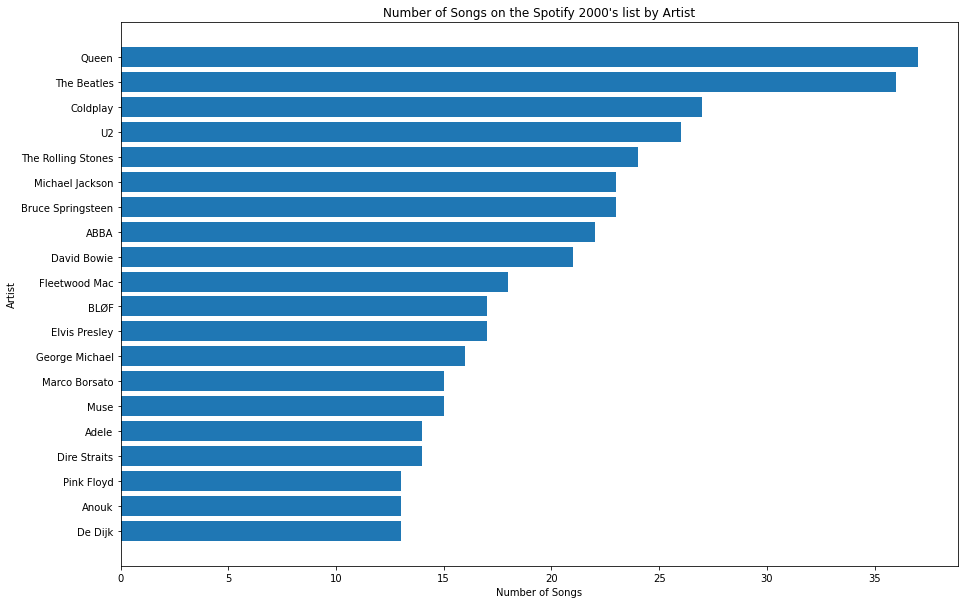

In [72]:
#Guiding Question #2
artist_frame = frame.groupby ('Artist').count()
artist_frame = pd.DataFrame(artist_frame, columns=["Title"])
artist_frame = artist_frame.rename(columns={"Title":"Count"})
artist_frame = artist_frame.sort_values(by="Count", ascending=False)
print(artist_frame)
myFig, ax = plt.subplots(figsize=(15,10))
ax.barh(artist_frame.index[:20], artist_frame['Count'][:20])
ax.set_yticklabels(artist_frame.index)
ax.invert_yaxis()
ax.set_xlabel('Number of Songs')
ax.set_ylabel('Artist')
ax.set_title("Number of Songs on the Spotify 2000's list by Artist")


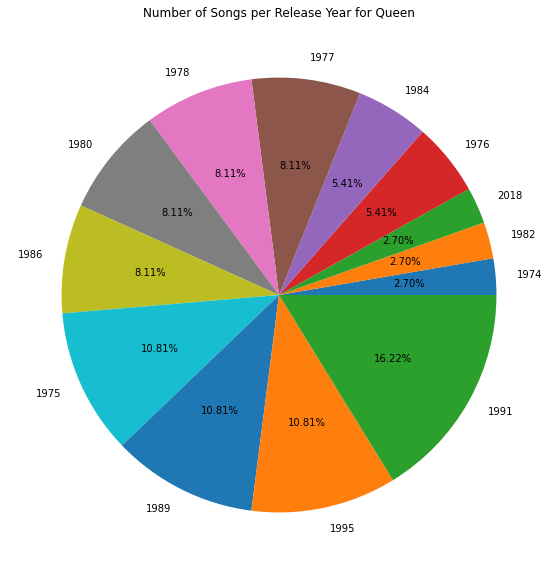

In [73]:
#Guiding Question #2 (Follow-up)
#Queen is the artist that has the most number of songs on the top 2000s list on Spotify, what year did the band create the most songs that landed on the top 2000s list
fig = plt.figure(figsize=(15,10))
Queen = frame[frame['Artist'] == 'Queen']
year_frame = Queen.groupby('Year').count()
year_frame = pd.DataFrame(year_frame, columns=["Title"])
year_frame = year_frame.rename(columns={"Title":"Count"})
year_frame = year_frame.sort_values(by="Count", ascending=True)
plt.pie(year_frame['Count'], labels=year_frame.index, autopct='%1.2f%%')
plt.title("Number of Songs per Release Year for Queen")
plt.show()

Popularity
11     1
12     1
13     1
20     1
21     1
      ..
59    13
73    13
50    13
66    14
63    21
Name: Count, Length: 61, dtype: int64


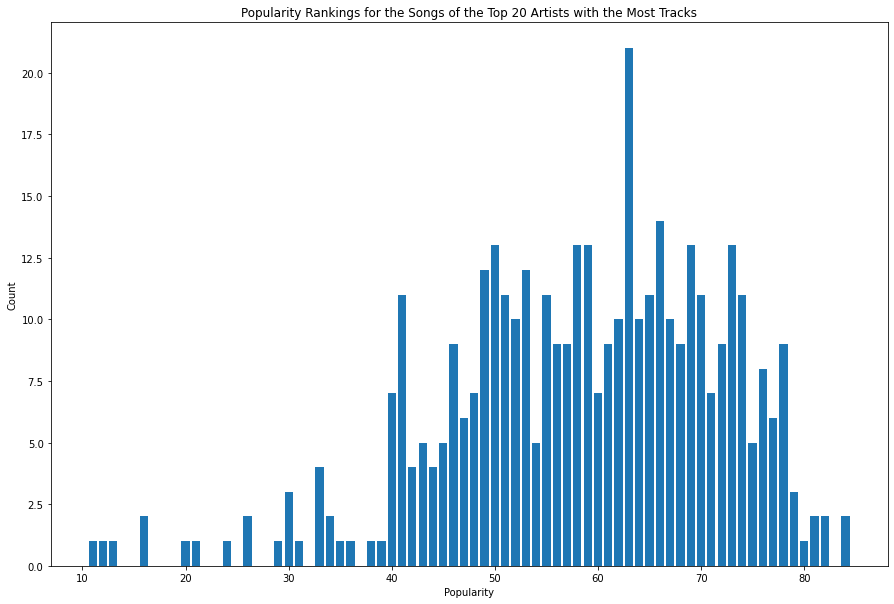

In [74]:
#Guiding Question #3 
#What is the distribution of popularity for the top 20 artists?
artist_frame = frame.groupby('Artist').count()
artist_frame = pd.DataFrame(artist_frame, columns=["Title"])
artist_frame = artist_frame.rename(columns={"Title":"Count"})
artist_frame = artist_frame.sort_values(by="Count", ascending=False)
top_artists = artist_frame.index[:20]
new_frame = []
for x in top_artists:
  new_frame.append(frame[frame["Artist"] == x])
total_frame = pd.concat(new_frame)
count_frame = total_frame.groupby('Popularity').count()
count_frame = pd.DataFrame(count_frame, columns=["Title"])
count_frame = count_frame.rename(columns={"Title":"Count"})
count_frame = count_frame.sort_values(by="Count", ascending=True)
print(count_frame["Count"])
myFig = plt.figure(figsize=(15,10))
plt.bar(count_frame.index, count_frame["Count"])
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.title("Popularity Rankings for the Songs of the Top 20 Artists with the Most Tracks")
plt.show()
#myFig, ax = plt.subplots(figsize=(15,10))
#ax.barh(artist_frame.index[:20], artist_frame['Count'][:20])
#ax.set_yticklabels(artist_frame.index)
#ax.invert_yaxis()
#ax.set_xlabel('Number of Songs')
#ax.set_ylabel('Artist')
#ax.set_title("Number of Songs on the Spotify 2000's list by Artist")

#What genre did the top 20 artists with the top songs fall under?


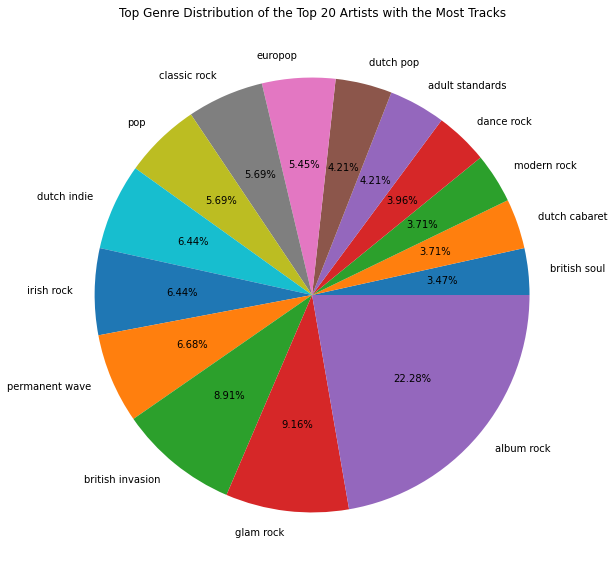

In [75]:
#Guiding Question #2 Follow-up
#What genre did the top 20 artists with the top songs fall under?
artist_frame = frame.groupby('Artist').count()
artist_frame = pd.DataFrame(artist_frame, columns=["Title"])
artist_frame = artist_frame.rename(columns={"Title":"Count"})
artist_frame = artist_frame.sort_values(by="Count", ascending=False)
top_artists = artist_frame.index[:20]
new_frame = []
for x in top_artists:
  new_frame.append(frame[frame["Artist"] == x])
total_frame = pd.concat(new_frame)
count_frame = total_frame.groupby('Top Genre').count()
count_frame = pd.DataFrame(count_frame, columns=["Title"])
count_frame = count_frame.rename(columns={"Title":"Count"})
count_frame = count_frame.sort_values(by="Count", ascending=True)
myFig = plt.figure(figsize=(15,10))
plt.pie(count_frame['Count'], labels=count_frame.index, autopct='%1.2f%%')
plt.title("Top Genre Distribution of the Top 20 Artists with the Most Tracks")
plt.show()

['adult standards' 'album rock' 'alternative hip hop' 'alternative metal'
 'classic rock' 'alternative pop rock' 'pop' 'modern rock'
 'detroit hip hop' 'alternative rock' 'dutch indie' 'garage rock'
 'dutch cabaret' 'permanent wave' 'classic uk pop' 'dance pop'
 'modern folk rock' 'dutch pop' 'dutch americana' 'alternative dance'
 'german pop' 'afropop' 'british soul' 'irish rock' 'disco' 'big room'
 'art rock' 'danish pop rock' 'neo mellow' 'britpop' 'boy band'
 'carnaval limburg' 'arkansas country' 'latin alternative' 'british folk'
 'celtic' 'chanson' 'celtic rock' 'hip pop' 'east coast hip hop'
 'dutch rock' 'blues rock' 'electro' 'australian pop' 'belgian rock'
 'downtempo' 'reggae fusion' 'british invasion' 'finnish metal'
 'canadian pop' 'bow pop' 'dutch hip hop' 'dutch metal' 'soft rock'
 'acoustic pop' 'acid jazz' 'dutch prog' 'candy pop' 'operatic pop'
 'trance' 'scottish singer-songwriter' 'mellow gold' 'alternative pop'
 'dance rock' 'atl hip hop' 'eurodance' 'blues' 'canad

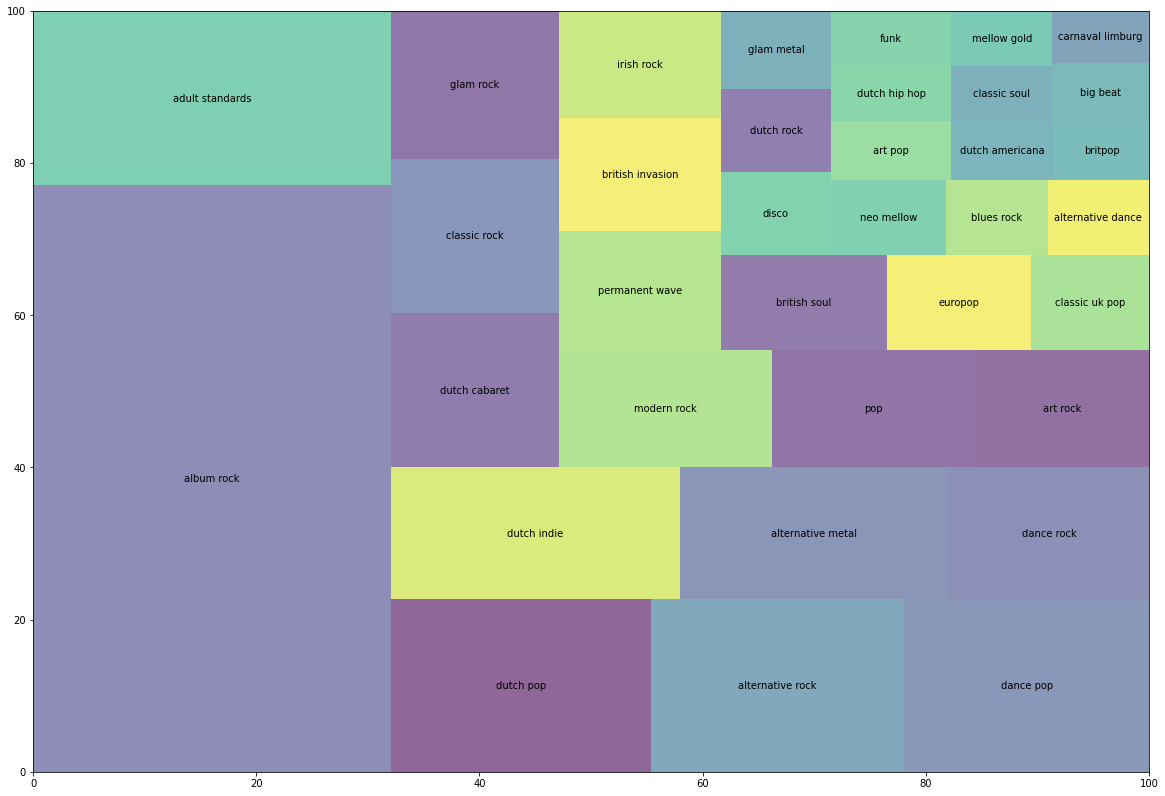

      Count
Year       
1956      1
1958      5
1959      3
1960      1
1961      1
...     ...
2015     42
2016     35
2017     45
2018     52
2019     21

[63 rows x 1 columns]
[ 1  5  3  1  1  3  7  9 15 20 37 27 38 40 43 29 29 23 36 31 51 31 40 37
 15 32 30 44 34 42 46 30 34 19 52 35 28 25 39 24 35 45 29 33 30 47 28 45
 44 40 36 54 43 33 46 41 41 43 42 35 45 52 21]
[1956 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018 2019]


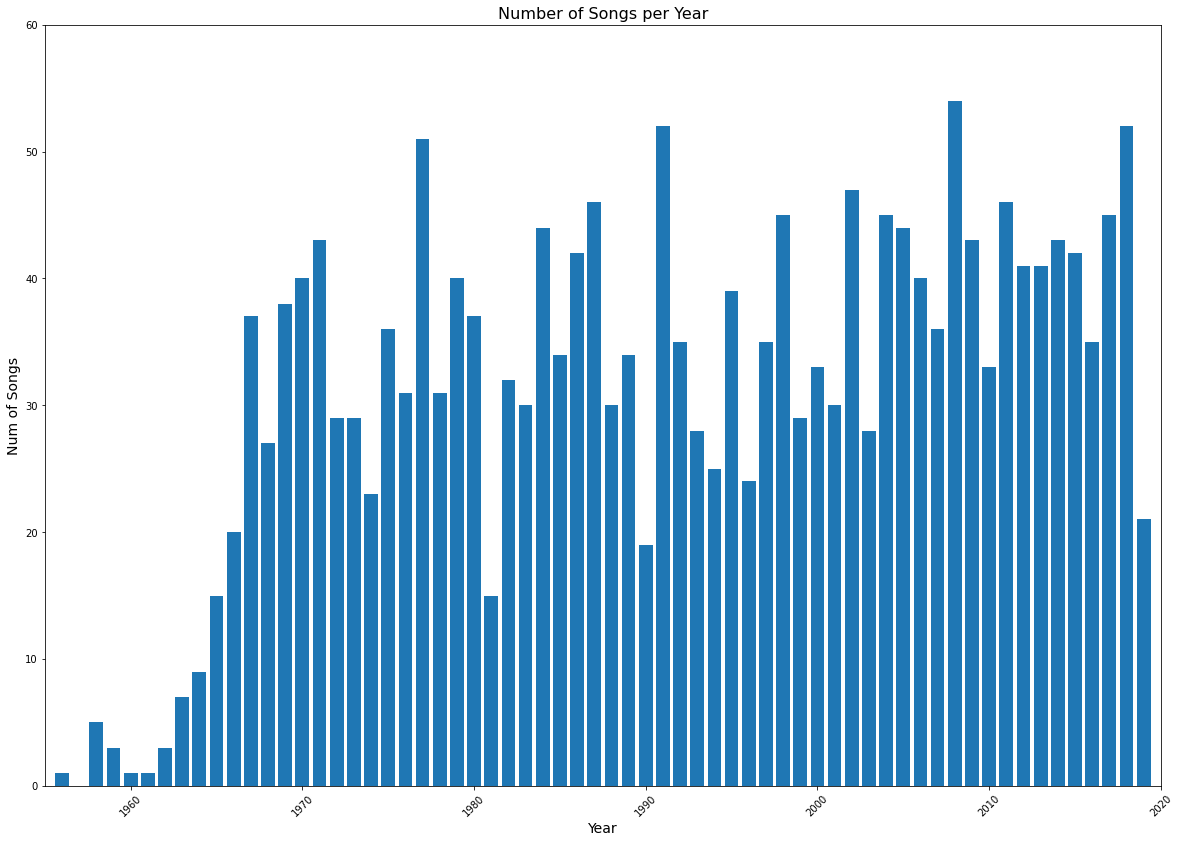

In [76]:
#Guiding Question #3
#Types of Genre available on Spotify
genres = frame['Top Genre'].unique()
print(genres)
#Count of number of songs associated with each genre
import matplotlib.pyplot as plt
import pandas as pd
genre_frame = frame.groupby('Top Genre').count()
genre_frame = pd.DataFrame(genre_frame, columns=["Title"])
genre_frame = genre_frame.rename(columns={"Title":"Count"})
genre_frame = genre_frame.sort_values(by="Count", ascending=False)
print(genre_frame)
#Create a treemap of the top 35 most popular genres on Spotify based on dataset
count = genre_frame.index.values.tolist()
myFig = plt.figure(1, figsize=(20,14))
squarify.plot(sizes=genre_frame['Count'][:35], label=count[:35], alpha=0.6)
plt.show()
#How does the year affect this outlook? Are the genres skewed to favor one decade over another?
myFig_1 = plt.figure(1, figsize=(20,14))
year_frame = frame.groupby('Year').count()
year_frame = pd.DataFrame(year_frame, columns=["Title"])
year_frame = year_frame.rename(columns={"Title":"Count"})
print(year_frame)
count_1 = year_frame['Count'].values
print(count_1)
unique_year = frame['Year'].unique()
unique_year = np.sort(unique_year)
print(unique_year)
year_values = pd.DataFrame(unique_year, count_1)
year_values
plt.bar(unique_year, count_1)
plt.style.use('ggplot')
plt.axis([1955, 2020, 0, 60])
plt.xticks(rotation=45)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Num of Songs", fontsize=14)
plt.title("Number of Songs per Year", fontsize=16)
plt.show()


Takeaways:
1. There are 149 different types of genres for songs on the Spotify platform
2. The largest genre group on Spotify is album rock. From the dataset, 413 songs are listed under this genre group. 